<a href="https://colab.research.google.com/github/WiktoriaGnojek23/DATA-602/blob/main/08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

Data Science Salaries 2023 💸
Salaries of Different Data Science Fields in the Data Science Domain

Data Science Job Salaries Dataset contains 11 columns, each are:

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year

employment_type: The type of employment for the role

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely

company_location: The country of the employer's main office or contracting branch

company_size: The median number of people that worked for the company during the **year**

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [ ]:
import pandas as pd

file_path = "https://raw.githubusercontent.com/WiktoriaGnojek23/DATA-602/main/ds_salaries.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print(df.head(10))

# relevant information
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

# Calculate summary statistics
summary_stats = df.describe()

# specific statistics
means = summary_stats.loc['mean']
medians = summary_stats.loc['50%']  # equivalent to summary_stats.loc['median']
quartiles = summary_stats.loc[['25%', '50%', '75%']]

# Print the results
print("Means:")
print(means)
print("\nMedians:")
print(medians)
print("\nQuartiles:")
print(quartiles)

# missing values
missing_values = df.isnull().sum()

# Print the missing value information
print("Missing Value Information:")
print(missing_values)


# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [23]:
# Drop missing values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Rename columns
df = df.rename(columns={'company_location': 'location', 'salary_currency': 'currency'})

# Filter rows based on conditions
filtered_df = df[df['remote_ratio'] == 100]

print(df)


      work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary currency  salary_in_usd employee_residence  remot

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



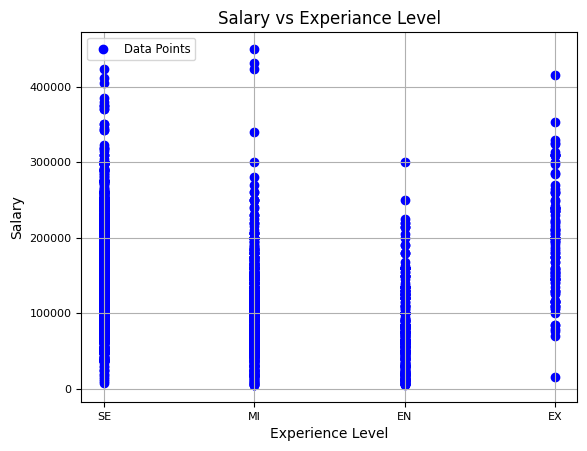

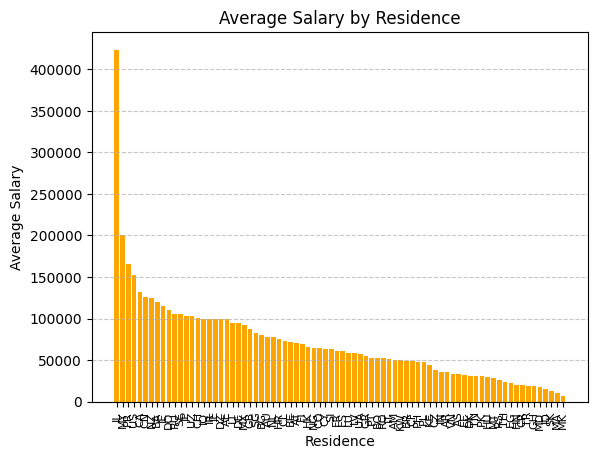

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "https://raw.githubusercontent.com/WiktoriaGnojek23/DATA-602/main/ds_salaries.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Scatter Plot
plt.scatter(df['experience_level'], df['salary_in_usd'], label='Data Points', color='blue', marker='o')
plt.title('Salary vs Experiance Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.legend(loc='upper left', fontsize='small')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.annotate('Outlier', xy=(10, 130000), xytext=(12, 100000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)
plt.grid(True)
plt.show()

# Bar Plot
avg_salary_by_role = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)
plt.bar(avg_salary_by_role.index, avg_salary_by_role.values, color='orange')
plt.title('Average Salary by Residence')
plt.xlabel('Residence')
plt.ylabel('Average Salary')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


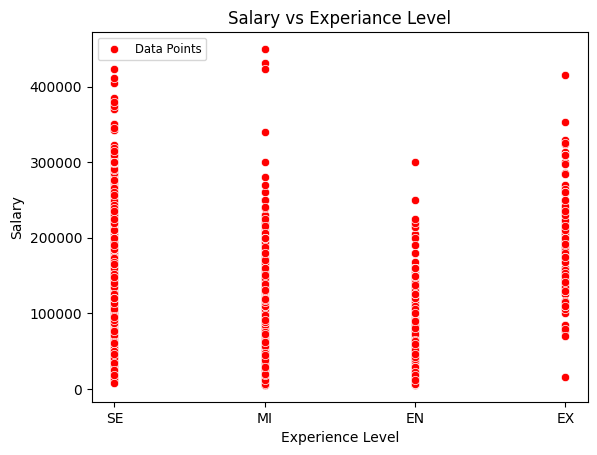

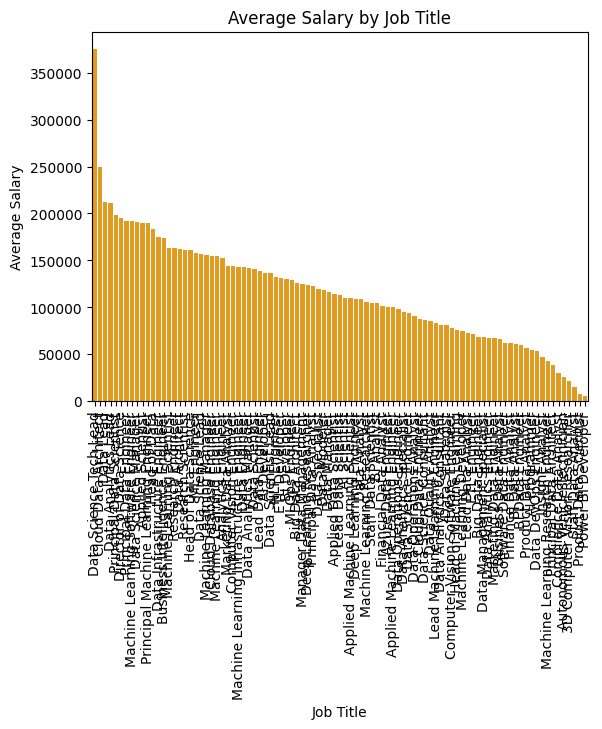

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "https://raw.githubusercontent.com/WiktoriaGnojek23/DATA-602/main/ds_salaries.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Scatter Plot using SEABORN
sns.scatterplot(x='experience_level', y='salary_in_usd', data=df, marker='o', color='red')
plt.title('Salary vs Experiance Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.legend(['Data Points'], loc='upper left', fontsize='small')
plt.show()

# Bar Plot using SEABORN
avg_salary_by_role = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
sns.barplot(x=avg_salary_by_role.index, y=avg_salary_by_role.values, color='orange')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

Seaborn provides easier graphics, with fewer lines of code to create making it aesthetically more pleasing. 

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

For the matplotlib graph, we notice that salaries range but can conclude that those title "SE" are more likely to earn in the higher ranges as opposed to the others. We can also conclude that those residing in IL earn the highest on average compared to other states. In our Seaborn graphics, we can conclude that those with the job title of Data Science Tech Lead, earn on average more then all other job titles. 